In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [158]:
df = pd.read_csv("diabetes_clinical_trial_generated.csv")
df

,Patient ID,Age,Sex,BMI,Condition,Trial Group,Metformin Dosage (mg),Baseline HbA1c (%),Week 12 HbA1c (%),Week 24 HbA1c (%),Adverse Events,Smoking Status,Duration of Diabetes (Years)
0,1,56,Male,38.6,Type 2 Diabetes,Control,0,11.4,11.1,10.8,1,No,20
1,2,69,F,35.4,Type 2 Diabetes,Treatment,500,9.1,8.4,7.6,3,Yes,4
2,3,46,Male,32.9,Type 2 Diabetes,Treatment,2500,9.2,8.4,7.9,3,Yes,2
3,4,32,Female,31.0,Type 2 Diabetes,Treatment,2000,6.6,5.4,3.9,3,No,18
4,5,60,Female,26.5,Type 2 Diabetes,Control,0,8.7,8.4,8.4,0,Yes,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,30,M,NaN,Type 2 Diabetes,Treatment,1000,8.1,6.3,5.8,0,Yes,4
196,197,68,Male,33.1,Type 2 Diabetes,Control,0,8.1,8.0,7.7,1,No,5
197,198,80,F,34.4,Type 2 Diabetes,Treatment,1500,10.4,9.4,7.9,3,Yes,8
198,199,49,F,23.6,Type 2 Diabetes,Control,0,8.7,8.5,8.3,1,No,9


# Standardizing Categorical Data

### Handle Inconsistencies

In [159]:
print(df.dtypes)

Patient ID                        int64
Age                               int64
Sex                              object
BMI                             float64
Condition                        object
Trial Group                      object
Metformin Dosage (mg)             int64
Baseline HbA1c (%)              float64
Week 12 HbA1c (%)               float64
Week 24 HbA1c (%)               float64
Adverse Events                    int64
Smoking Status                   object
Duration of Diabetes (Years)      int64
dtype: object


In [160]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values in '{column}': {df[column].unique()}")

Unique values in 'Sex': ['Male' 'F' 'Female' 'M']
Unique values in 'Condition': ['Type 2 Diabetes']
Unique values in 'Trial Group': ['Control' 'Treatment']
Unique values in 'Smoking Status': ['No' 'Yes']


In [161]:
# Standardize Sex column 
df['Sex'] = df['Sex'].replace({'Female': 'F', 'Male': 'M'})
# Get rid of Condition column
df = df.drop('Condition', axis=1)

df

,Patient ID,Age,Sex,BMI,Trial Group,Metformin Dosage (mg),Baseline HbA1c (%),Week 12 HbA1c (%),Week 24 HbA1c (%),Adverse Events,Smoking Status,Duration of Diabetes (Years)
0,1,56,M,38.6,Control,0,11.4,11.1,10.8,1,No,20
1,2,69,F,35.4,Treatment,500,9.1,8.4,7.6,3,Yes,4
2,3,46,M,32.9,Treatment,2500,9.2,8.4,7.9,3,Yes,2
3,4,32,F,31.0,Treatment,2000,6.6,5.4,3.9,3,No,18
4,5,60,F,26.5,Control,0,8.7,8.4,8.4,0,Yes,19
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,30,M,NaN,Treatment,1000,8.1,6.3,5.8,0,Yes,4
196,197,68,M,33.1,Control,0,8.1,8.0,7.7,1,No,5
197,198,80,F,34.4,Treatment,1500,10.4,9.4,7.9,3,Yes,8
198,199,49,F,23.6,Control,0,8.7,8.5,8.3,1,No,9


### Feature Engineering

#### Note: Choosing the Right Method
**Label Encoding**: ordinal data or when you have a binary categorical feature.<br>
**One-Hot Encoding**: nominal data where no ordinal relationship exists, and there are not too many categories. <br>
**Frequency Encoding**: used if the frequency of categories is meaningful for prediction. <br> <br>

In this case both Label Encoding and One-Hot Encoding (with dropping the first dummy column) effectively produce a similar outcome.

In [162]:
# apply One-Hot Encoding to multiple columns and drop the first dummy variable for each
df = pd.get_dummies(df, columns=['Sex', 'Trial Group', 'Smoking Status'], drop_first=True)
df

,Patient ID,Age,BMI,Metformin Dosage (mg),Baseline HbA1c (%),Week 12 HbA1c (%),Week 24 HbA1c (%),Adverse Events,Duration of Diabetes (Years),Sex_M,Trial Group_Treatment,Smoking Status_Yes
0,1,56,38.6,0,11.4,11.1,10.8,1,20,True,False,False
1,2,69,35.4,500,9.1,8.4,7.6,3,4,False,True,True
2,3,46,32.9,2500,9.2,8.4,7.9,3,2,True,True,True
3,4,32,31.0,2000,6.6,5.4,3.9,3,18,False,True,False
4,5,60,26.5,0,8.7,8.4,8.4,0,19,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,30,NaN,1000,8.1,6.3,5.8,0,4,True,True,True
196,197,68,33.1,0,8.1,8.0,7.7,1,5,True,False,False
197,198,80,34.4,1500,10.4,9.4,7.9,3,8,False,True,True
198,199,49,23.6,0,8.7,8.5,8.3,1,9,False,False,False


In [163]:
print(df.dtypes)

Patient ID                        int64
Age                               int64
BMI                             float64
Metformin Dosage (mg)             int64
Baseline HbA1c (%)              float64
Week 12 HbA1c (%)               float64
Week 24 HbA1c (%)               float64
Adverse Events                    int64
Duration of Diabetes (Years)      int64
Sex_M                              bool
Trial Group_Treatment              bool
Smoking Status_Yes                 bool
dtype: object


In [164]:
# Convert boolean to 0 & 1
columns_to_convert = [col for col in df.columns if df[col].dtype == 'bool']
for col in columns_to_convert:
    df[col] = df[col].astype(int)
    
df

,Patient ID,Age,BMI,Metformin Dosage (mg),Baseline HbA1c (%),Week 12 HbA1c (%),Week 24 HbA1c (%),Adverse Events,Duration of Diabetes (Years),Sex_M,Trial Group_Treatment,Smoking Status_Yes
0,1,56,38.6,0,11.4,11.1,10.8,1,20,1,0,0
1,2,69,35.4,500,9.1,8.4,7.6,3,4,0,1,1
2,3,46,32.9,2500,9.2,8.4,7.9,3,2,1,1,1
3,4,32,31.0,2000,6.6,5.4,3.9,3,18,0,1,0
4,5,60,26.5,0,8.7,8.4,8.4,0,19,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,30,NaN,1000,8.1,6.3,5.8,0,4,1,1,1
196,197,68,33.1,0,8.1,8.0,7.7,1,5,1,0,0
197,198,80,34.4,1500,10.4,9.4,7.9,3,8,0,1,1
198,199,49,23.6,0,8.7,8.5,8.3,1,9,0,0,0


# Dealing with Outliers

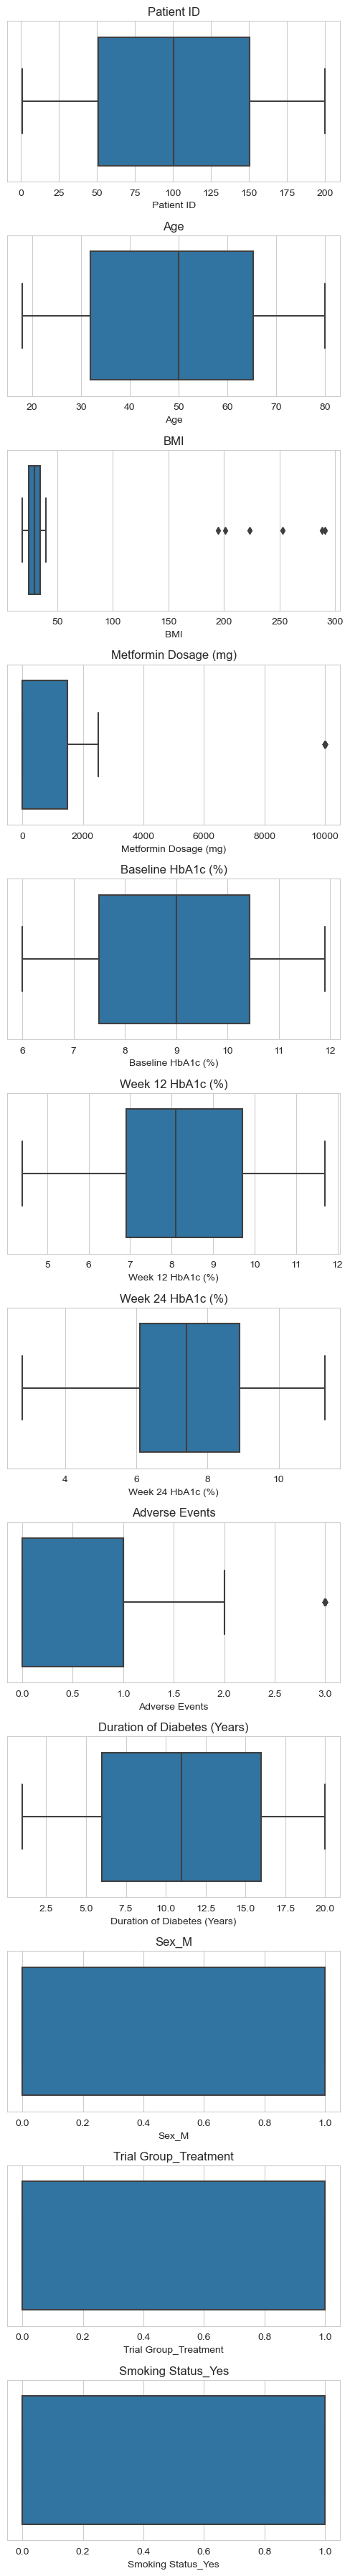

In [165]:
sns.set_style("whitegrid")

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
n_cols = len(num_cols)
fig, axs = plt.subplots(n_cols, 1, figsize=(5, 3 * n_cols))

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()


In [166]:
# Identify outliers using the IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (df[column] < lower_bound) | (df[column] > upper_bound)

In [167]:
outliers_bmi = df[find_outliers_iqr(df, 'BMI')]

print("Number of outliers in BMI:", outliers_bmi.shape[0])
outliers_bmi

Number of outliers in BMI: 6


,Patient ID,Age,BMI,Metformin Dosage (mg),Baseline HbA1c (%),Week 12 HbA1c (%),Week 24 HbA1c (%),Adverse Events,Duration of Diabetes (Years),Sex_M,Trial Group_Treatment,Smoking Status_Yes
12,13,28,223.0,0,8.0,7.7,7.5,0,4,1,0,1
26,27,55,291.0,1000,8.2,7.0,5.8,1,17,1,1,0
48,49,64,201.0,9999,11.2,10.4,9.2,2,13,1,1,0
91,92,23,253.0,2500,6.4,4.6,2.8,2,9,0,1,1
117,118,33,288.0,0,11.4,11.0,11.0,0,5,0,0,0
127,128,77,195.0,0,11.4,11.0,10.6,1,7,0,0,1


##### BMI outliers seem to be caused by data entry errors (e.g., decimal place errors). Adjust the BMI values for outliers to be 10% of their original values.

In [168]:
# Identify outliers in the BMI column
outliers_bmi_indices = find_outliers_iqr(df, 'BMI')

# Adjust the BMI values for these outliers to be 10% of their original values
df.loc[outliers_bmi_indices, 'BMI'] = df.loc[outliers_bmi_indices, 'BMI'] * 0.1

print(df.loc[outliers_bmi_indices, ['Patient ID', 'BMI']])

     Patient ID   BMI
12           13  22.3
26           27  29.1
48           49  20.1
91           92  25.3
117         118  28.8
127         128  19.5


In [169]:
outliers_adverse_events = df[find_outliers_iqr(df, 'Adverse Events')]

print("Number of outliers in Adverse Events:", outliers_adverse_events.shape[0])
outliers_adverse_events

Number of outliers in Adverse Events: 29


,Patient ID,Age,BMI,Metformin Dosage (mg),Baseline HbA1c (%),Week 12 HbA1c (%),Week 24 HbA1c (%),Adverse Events,Duration of Diabetes (Years),Sex_M,Trial Group_Treatment,Smoking Status_Yes
1,2,69,35.4,500,9.1,8.4,7.6,3,4,0,1,1
2,3,46,32.9,2500,9.2,8.4,7.9,3,2,1,1,1
3,4,32,31.0,2000,6.6,5.4,3.9,3,18,0,1,0
10,11,36,28.1,2500,7.9,6.4,4.7,3,12,1,1,1
15,16,70,22.3,500,9.6,9.0,NaN,3,13,0,1,0
18,19,41,34.0,9999,9.0,7.6,6.2,3,1,0,1,1
32,33,75,37.1,9999,7.4,6.2,5.0,3,15,0,1,0
35,36,61,30.8,500,7.5,6.8,5.7,3,14,0,1,1
69,70,26,27.5,500,9.2,8.4,7.9,3,18,0,1,0
71,72,70,31.6,2000,8.0,7.2,6.6,3,1,1,1,1


###### An adverse event score of 3 is within a plausible range and does not indicate a data entry error; therefore the outliers can be ignored. However, it might be helpful to consult with clinical experts or stakeholders in the study to understand the implications of adverse event scores and decide on the best course of action.

In [170]:
outliers_metformin_dosage = df[find_outliers_iqr(df, 'Metformin Dosage (mg)')]

outliers_metformin_dosage
print("Number of outliers in Metformin Dosage (mg):", outliers_metformin_dosage.shape[0])
outliers_metformin_dosage

Number of outliers in Metformin Dosage (mg): 20


,Patient ID,Age,BMI,Metformin Dosage (mg),Baseline HbA1c (%),Week 12 HbA1c (%),Week 24 HbA1c (%),Adverse Events,Duration of Diabetes (Years),Sex_M,Trial Group_Treatment,Smoking Status_Yes
11,12,40,39.9,9999,7.3,6.5,4.8,2,6,1,1,0
18,19,41,34.0,9999,9.0,7.6,6.2,3,1,0,1,1
24,25,61,31.2,9999,6.8,6.0,4.9,1,13,0,1,1
32,33,75,37.1,9999,7.4,6.2,5.0,3,15,0,1,0
43,44,77,39.0,9999,8.5,8.0,6.8,0,18,1,1,1
48,49,64,20.1,9999,11.2,10.4,9.2,2,13,1,1,0
59,60,38,32.9,9999,7.9,6.3,5.2,1,5,1,1,1
61,62,56,24.0,9999,9.0,7.3,5.9,1,17,1,1,0
85,86,53,21.8,9999,11.0,10.1,8.8,2,16,1,1,0
92,93,71,30.0,9999,10.4,8.7,7.9,0,13,0,1,0


##### Outliers of Metformin Dosage (mg)  with a value of 9999 are likely placeholders or errors. Replace them with NaN to accurately reflect their status as unknown

In [171]:
# Check for missing data and the percentage of missing values in each column before replacing these with NaN
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

print("Missing Data Count:\n", missing_data)
print("\nMissing Data Percentage:\n", missing_percentage)

Missing Data Count:
 Patient ID                      0
Age                             0
BMI                             5
Metformin Dosage (mg)           0
Baseline HbA1c (%)              0
Week 12 HbA1c (%)               1
Week 24 HbA1c (%)               3
Adverse Events                  0
Duration of Diabetes (Years)    0
Sex_M                           0
Trial Group_Treatment           0
Smoking Status_Yes              0
dtype: int64

Missing Data Percentage:
 Patient ID                      0.0
Age                             0.0
BMI                             2.5
Metformin Dosage (mg)           0.0
Baseline HbA1c (%)              0.0
Week 12 HbA1c (%)               0.5
Week 24 HbA1c (%)               1.5
Adverse Events                  0.0
Duration of Diabetes (Years)    0.0
Sex_M                           0.0
Trial Group_Treatment           0.0
Smoking Status_Yes              0.0
dtype: float64


There are no missing values of Metformin Dosage (mg) in the raw dataset

In [172]:
df.loc[df['Metformin Dosage (mg)'] == 9999, 'Metformin Dosage (mg)'] = pd.NA

# Dealing with Missing Data

In [173]:
# Check for missing data and the percentage of missing values in each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

print("Missing Data Count:\n", missing_data)
print("\nMissing Data Percentage:\n", missing_percentage)

Missing Data Count:
 Patient ID                       0
Age                              0
BMI                              5
Metformin Dosage (mg)           20
Baseline HbA1c (%)               0
Week 12 HbA1c (%)                1
Week 24 HbA1c (%)                3
Adverse Events                   0
Duration of Diabetes (Years)     0
Sex_M                            0
Trial Group_Treatment            0
Smoking Status_Yes               0
dtype: int64

Missing Data Percentage:
 Patient ID                       0.0
Age                              0.0
BMI                              2.5
Metformin Dosage (mg)           10.0
Baseline HbA1c (%)               0.0
Week 12 HbA1c (%)                0.5
Week 24 HbA1c (%)                1.5
Adverse Events                   0.0
Duration of Diabetes (Years)     0.0
Sex_M                            0.0
Trial Group_Treatment            0.0
Smoking Status_Yes               0.0
dtype: float64


In [174]:
# Inspect rows with missing data in any column
missing_data_subset = df[df.isnull().any(axis=1)]
missing_data_subset

,Patient ID,Age,BMI,Metformin Dosage (mg),Baseline HbA1c (%),Week 12 HbA1c (%),Week 24 HbA1c (%),Adverse Events,Duration of Diabetes (Years),Sex_M,Trial Group_Treatment,Smoking Status_Yes
11,12,40,39.9,NaN,7.3,6.5,4.8,2,6,1,1,0
15,16,70,22.3,500.0,9.6,9.0,NaN,3,13,0,1,0
18,19,41,34.0,NaN,9.0,7.6,6.2,3,1,0,1,1
24,25,61,31.2,NaN,6.8,6.0,4.9,1,13,0,1,1
32,33,75,37.1,NaN,7.4,6.2,5.0,3,15,0,1,0
43,44,77,39.0,NaN,8.5,8.0,6.8,0,18,1,1,1
48,49,64,20.1,NaN,11.2,10.4,9.2,2,13,1,1,0
59,60,38,32.9,NaN,7.9,6.3,5.2,1,5,1,1,1
61,62,56,24.0,NaN,9.0,7.3,5.9,1,17,1,1,0
85,86,53,21.8,NaN,11.0,10.1,8.8,2,16,1,1,0


## Observations of missing values
#### 1. **Imputation for BMI**
First consider the distribution of BMI, then choose an imputation method (mean or median) that best fits the data's characteristics. 

#### 2. **Imputation for Metformin Dosage (mg)**
First consider the distribution of Metformin Dosage (mg), then choose an imputation method (mean or median) that best fits the data's characteristics. 

#### 3. **Handling Missing Biomarker Data**
Clinical judgments and trial conduct nuances significantly influence data handling strategies.

- **Patient 16 (Treatment Group) with Missing Week 24 Biomarker**: The high number of adverse events suggests that any imputation should be approached with caution, possibly exploring the potential relationship between adverse events and biomarker levels.
  
- **Patient 96 (Control Group) with Missing Week 12 and Week 24 Biomarkers**: The patient might have withdrawn due to age.
  
- **Patient 185 (Treatment Group) with Missing Week 24 Biomarker**: High age and/or adverse events might cause the missing biomarker data.

#### 4. **Further Investigation and Follow-up**
- Documenting Reasons for Missing Data
- Sensitivity Analysis: understand how different imputation strategies might affect your findings can provide insights into the robustness of your conclusions.
- Consultation with Clinical Experts

### Imputation for BMI

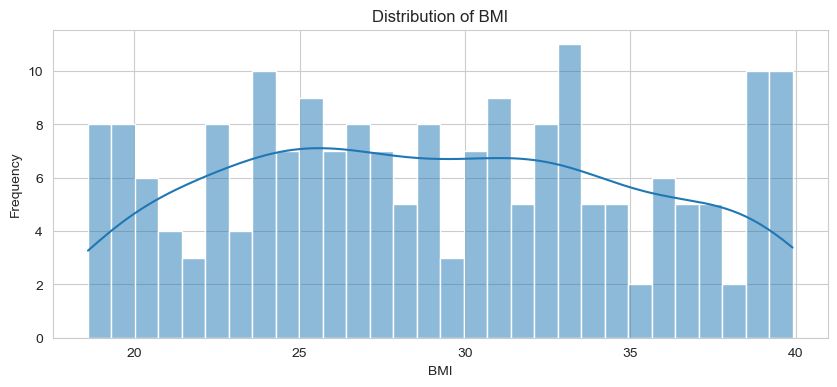

In [175]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of BMI
plt.figure(figsize=(10, 4))
sns.histplot(df['BMI'].dropna(), kde=True, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.show()

In [176]:
# Sincethe distribution is symmetric , the mean imputation is appropriate
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

### Imputation for Metformin Dosage (mg)

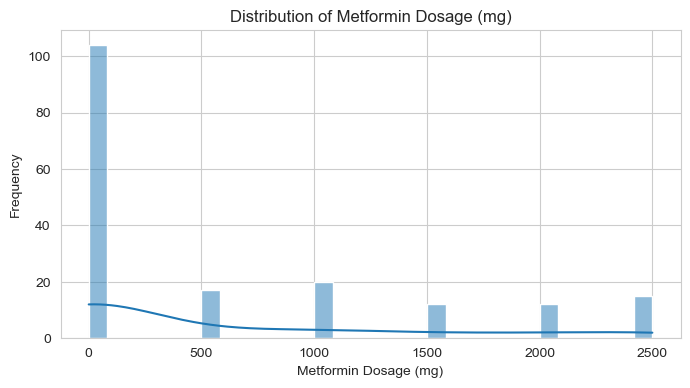

In [177]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of BMI
plt.figure(figsize=(8, 4))
sns.histplot(df['Metformin Dosage (mg)'].dropna(), kde=True, bins=30)
plt.title('Distribution of Metformin Dosage (mg)')
plt.xlabel('Metformin Dosage (mg)')
plt.ylabel('Frequency')

plt.show()

In [178]:
# Sincethe distribution is skewed, the median imputation is appropriate
df['Metformin Dosage (mg)'].fillna(df['Metformin Dosage (mg)'].median(), inplace=True)

### Deletion Patient 96 record

In [179]:
df = df[df['Patient ID'] != 96]

### Apply KNN imputation for patients 16 and 185 to address missing biomarker data
first perform KNN imputation on the entire dataset, and then selectively updatr the records of these patients with the imputed values

In [180]:
# Initialize the KNN Imputer with a suitable number of neighbors; here, we use 5 as an example
imputer = KNNImputer(n_neighbors=5)

# Assuming all columns are relevant. If not, select only relevant columns for imputation
# For example, using numeric columns and assuming biomarker data is numeric
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Apply KNN imputation
df_imputed = imputer.fit_transform(df_numeric)

# Update the DataFrame with the imputed data
df[numeric_columns] = df_imputed

# Check the imputed values for patients 16 and 185
patients_imputed_values = df[df['Patient ID'].isin([16, 185])]

/var/folders/q6/qn3r4jd57m59r7hb84c0z0ch0000gn/T/ipykernel_60041/2697009675.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df_imputed


In [181]:
patients_imputed_values

,Patient ID,Age,BMI,Metformin Dosage (mg),Baseline HbA1c (%),Week 12 HbA1c (%),Week 24 HbA1c (%),Adverse Events,Duration of Diabetes (Years),Sex_M,Trial Group_Treatment,Smoking Status_Yes
15,16.0,70.0,22.3,500.0,9.6,9.0,7.12,3.0,13.0,0.0,1.0,0.0
184,185.0,72.0,39.3,500.0,9.1,7.2,7.52,2.0,20.0,1.0,1.0,0.0


# Final Data Review

#### 1. Consistency Check

In [184]:
# Check data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

Patient ID                      float64
Age                             float64
BMI                             float64
Metformin Dosage (mg)           float64
Baseline HbA1c (%)              float64
Week 12 HbA1c (%)               float64
Week 24 HbA1c (%)               float64
Adverse Events                  float64
Duration of Diabetes (Years)    float64
Sex_M                           float64
Trial Group_Treatment           float64
Smoking Status_Yes              float64
dtype: object
Patient ID                      0
Age                             0
BMI                             0
Metformin Dosage (mg)           0
Baseline HbA1c (%)              0
Week 12 HbA1c (%)               0
Week 24 HbA1c (%)               0
Adverse Events                  0
Duration of Diabetes (Years)    0
Sex_M                           0
Trial Group_Treatment           0
Smoking Status_Yes              0
dtype: int64


#### 2. Feature Engineering Review

In [185]:
print(df.columns)

Index(['Patient ID', 'Age', 'BMI', 'Metformin Dosage (mg)',
       'Baseline HbA1c (%)', 'Week 12 HbA1c (%)', 'Week 24 HbA1c (%)',
       'Adverse Events', 'Duration of Diabetes (Years)', 'Sex_M',
       'Trial Group_Treatment', 'Smoking Status_Yes'],
      dtype='object')


#### 3. Backup Cleaned Dataset

In [187]:
cleaned_dataset_path = 'cleaned_diabetes_clinical_trial_generated.csv'
df.to_csv(cleaned_dataset_path, index=False)